# Rock-Paper-Scissors Image Classification

In [96]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import PIL
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [12]:
data_dir = "C:\\Users\\dennis\\Desktop\\mlprojects\\data\\rockpaperscissors"
train_dir = "C:\\Users\\dennis\\Desktop\\mlprojects\\data\\rockpaperscissors\\train\\"
validation_dir = "C:\\Users\\dennis\\Desktop\\mlprojects\\data\\rockpaperscissors\\test\\"

In [13]:
os.listdir(train_dir)

['paper', 'rock', 'scissors']

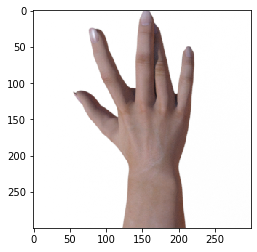

In [15]:
paper = train_dir + "paper\\" + os.listdir(train_dir + "paper\\")[0]
im_arry = imread(paper)
plt.imshow(im_arry);

In [35]:
def plot_classes_examples(directory):
    im_arrs = []
    for i in os.listdir(directory):
        im_arrs.append(imread(directory + i + "\\" + os.listdir(directory + i)[0]))
    
    plt.subplot(1,3,1)
    plt.title(f"Class of {os.listdir(directory)[0]}")
    plt.imshow(im_arrs[0])
    plt.axis("off")
    
    plt.subplot(1,3,2)
    plt.title(f"Class of {os.listdir(directory)[1]}")
    plt.imshow(im_arrs[1])
    plt.axis("off")
    
    plt.subplot(1,3,3)
    plt.title(f"Class of {os.listdir(directory)[2]}")
    plt.imshow(im_arrs[2])
    plt.axis("off")

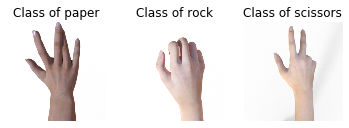

In [36]:
plot_classes_examples(train_dir)

In [38]:
w = 150
h = 150 
c = 3
input_shape = (w,h,c)

In [39]:
train_gen = ImageDataGenerator(rescale=1/255,
                               rotation_range=40,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True)

train_datagen = train_gen.flow_from_directory(train_dir,
                                              target_size=(w,h),
                                              class_mode="categorical",
                                              batch_size=32)

Found 2520 images belonging to 3 classes.


In [40]:
validation_gen = ImageDataGenerator(rescale=1/255)

validation_datagen = validation_gen.flow_from_directory(validation_dir,
                                                        target_size=(w,h),
                                                        class_mode="categorical",
                                                        batch_size=32)

Found 372 images belonging to 3 classes.


In [45]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",
                 input_shape=(w,h,c)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512,activation="relu"))

model.add(Dense(units=3,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",
              metrics=["acc"])

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [47]:
model.fit_generator(train_datagen,validation_data=validation_datagen,
                   epochs=10)

Epoch 1/10
79/79 [==============================] - 113s 1s/step - loss: 1.0882 - acc: 0.4480 - val_loss: 0.7117 - val_acc: 0.7957
Epoch 2/10
79/79 [==============================] - 111s 1s/step - loss: 0.7335 - acc: 0.6758 - val_loss: 0.5074 - val_acc: 0.9005
Epoch 3/10
79/79 [==============================] - 111s 1s/step - loss: 0.5319 - acc: 0.7897 - val_loss: 0.4921 - val_acc: 0.7796
Epoch 4/10
79/79 [==============================] - 111s 1s/step - loss: 0.4053 - acc: 0.8452 - val_loss: 0.1971 - val_acc: 0.9113
Epoch 5/10
79/79 [==============================] - 111s 1s/step - loss: 0.3013 - acc: 0.8992 - val_loss: 0.2824 - val_acc: 0.8790
Epoch 6/10
79/79 [==============================] - 112s 1s/step - loss: 0.2434 - acc: 0.9135 - val_loss: 0.1168 - val_acc: 0.9516
Epoch 7/10
79/79 [==============================] - 111s 1s/step - loss: 0.2247 - acc: 0.9202 - val_loss: 0.2205 - val_acc: 0.9086
Epoch 8/10
79/79 [==============================] - 111s 1s/step - loss: 0.1507 - a

In [49]:
losses = pd.DataFrame(model.history.history)
losses.columns

Index(['loss', 'acc', 'val_loss', 'val_acc'], dtype='object')

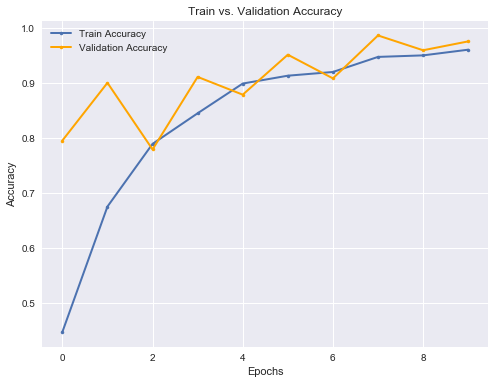

In [60]:
plt.style.use("seaborn")
plt.figure(figsize=(8,6))
plt.plot(losses["acc"],linewidth=2,marker=".",label="Train Accuracy")
plt.plot(losses["val_acc"],linewidth=2,marker=".",color="orange",label="Validation Accuracy")
plt.title("Train vs. Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend();

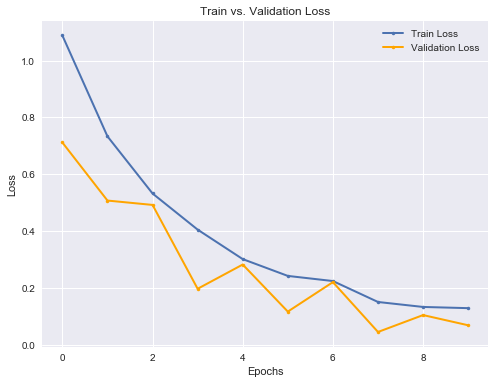

In [64]:
plt.style.use("seaborn")
plt.figure(figsize=(8,6))
plt.plot(losses["loss"],linewidth=2,marker=".",label="Train Loss")
plt.plot(losses["val_loss"],linewidth=2,marker=".",color="orange",label="Validation Loss")
plt.title("Train vs. Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();

In [66]:
train_datagen.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

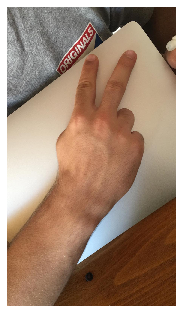

In [129]:
predicting_img = "C:\\Users\\dennis\\Desktop\\mlprojects\\data\\rockpaperscissors\\predict_img\\makas.jpg"
plt.imshow(imread(predicting_img))
plt.grid()
plt.axis("off");

In [132]:
def predicter_paper_rock_scissors(img_path):
    classes = ["Paper","Rock","Scissors"]
    my_img = image.load_img(img_path,target_size=(w,h))
    my_img_arry = image.img_to_array(my_img)
    my_img_arry = np.expand_dims(my_img_arry,axis=0)
    pred_ind = model.predict(my_img_arry)[0].argmax()
    prediction = classes[pred_ind]
    plt.figure(figsize=(8,6))
    plt.imshow(imread(img_path))
    plt.title(f"It's {prediction}")
    plt.grid()
    plt.axis("off")

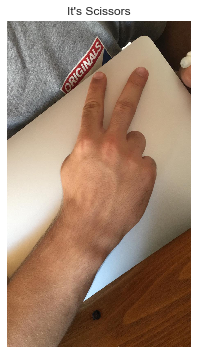

In [133]:
predicter_paper_rock_scissors(predicting_img)